In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Install xlrd module if not already installed
!pip install xlrd




In [12]:
df=pd.read_excel('Sales Data.xls')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [13]:
df.shape

(10194, 21)

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State/Province            object
Postal Code               object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [16]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [18]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.225854,3.791838,0.155385,28.673417
std,2942.898656,619.906839,2.228317,0.206249,232.465115
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,209.500000,5.000000,0.200000,29.297925
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


In [70]:
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [71]:
df['Country/Region'].value_counts()

Country/Region
United States    9994
Canada            200
Name: count, dtype: int64

In [72]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [73]:
df['Category'].value_counts()

Category
Office Supplies    6128
Furniture          2201
Technology         1865
Name: count, dtype: int64

In [74]:
df['Sub-Category'].nunique()

17

In [75]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1548
Paper          1384
Furnishings    1009
Phones          903
Storage         856
Art             821
Accessories     775
Chairs          634
Appliances      474
Labels          368
Tables          326
Envelopes       256
Bookcases       232
Fasteners       229
Supplies        192
Machines        117
Copiers          70
Name: count, dtype: int64

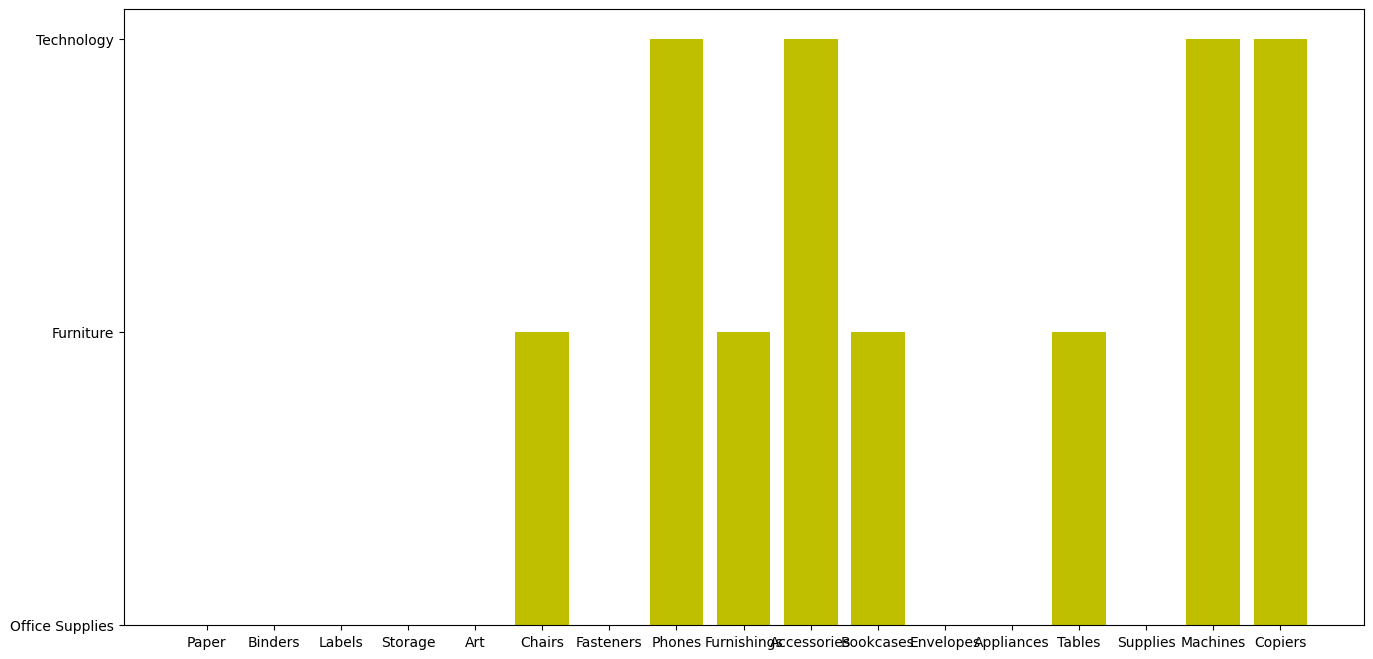

In [76]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

<Axes: xlabel='Segment'>

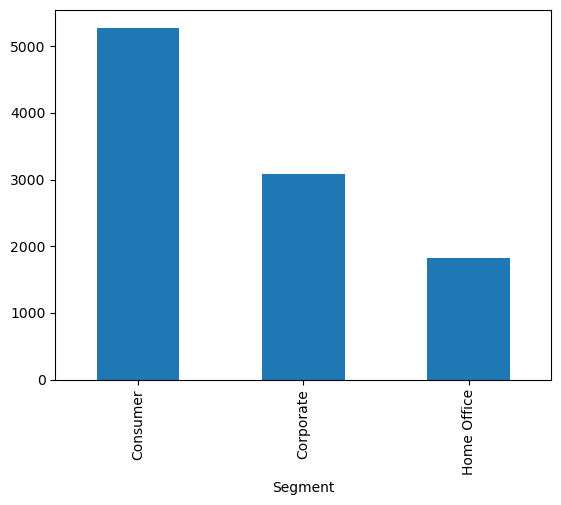

In [77]:
df["Segment"].value_counts().plot(kind="bar")

<Axes: >

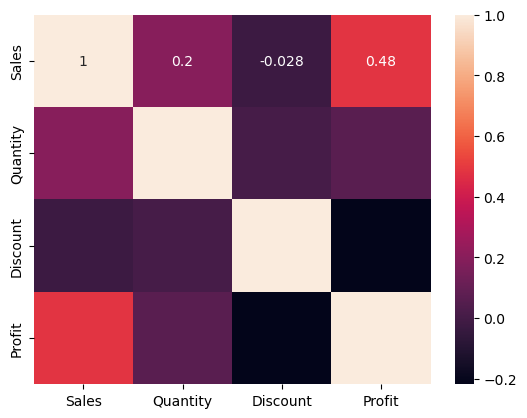

In [78]:
data=df[['Sales','Quantity','Discount','Profit']]
sns.heatmap(data.corr(),annot=True)

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product


<Axes: xlabel='Category'>

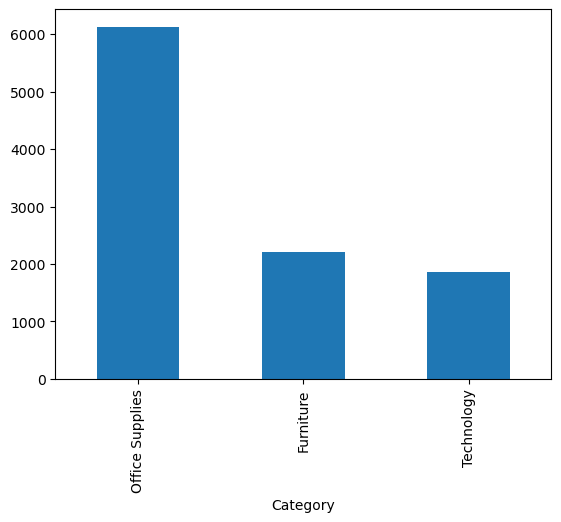

In [79]:
df['Category'].value_counts().plot(kind="bar")

<Axes: xlabel='Segment'>

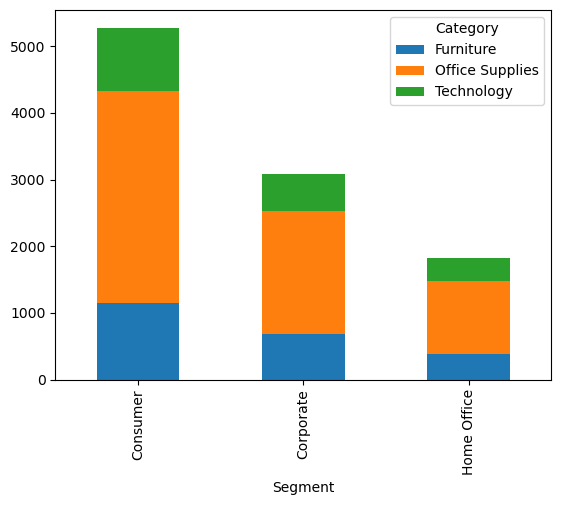

In [80]:
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

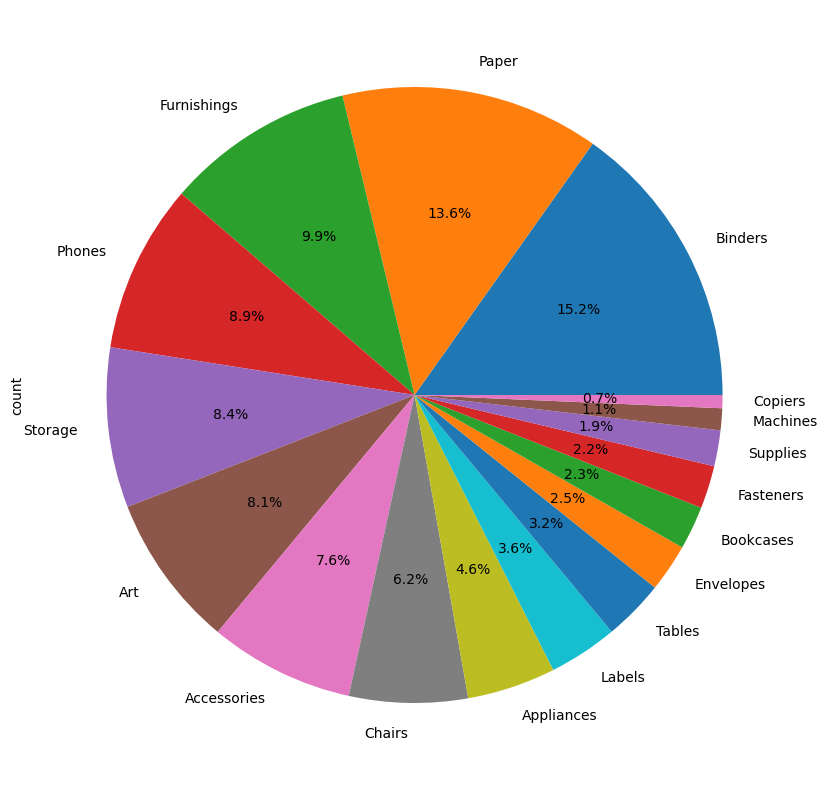

In [81]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.


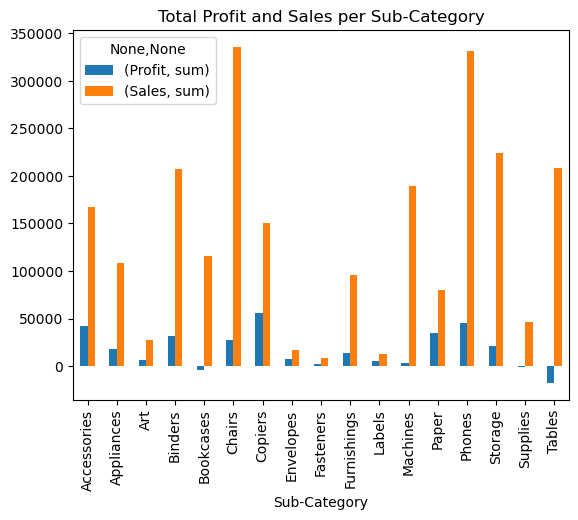

In [82]:
# Assuming df is your DataFrame containing 'Sub-Category', 'Profit', and 'Sales' columns
df.groupby('Sub-Category')[['Profit', 'Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()


Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

In [83]:
#number of products available in store
df['Product Name'].nunique()

1849

In [84]:
df['Product Name'].value_counts()

Product Name
Staples                                                                      50
Staple envelope                                                              48
Easy-staple paper                                                            46
KI Adjustable-Height Table                                                   20
Avery Non-Stick Binders                                                      20
                                                                             ..
Avery 484                                                                     1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts       1
Xerox 20                                                                      1
Plantronics Single Ear Headset                                                1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Name: count, Length: 1849, dtype: int64

<Axes: ylabel='count'>

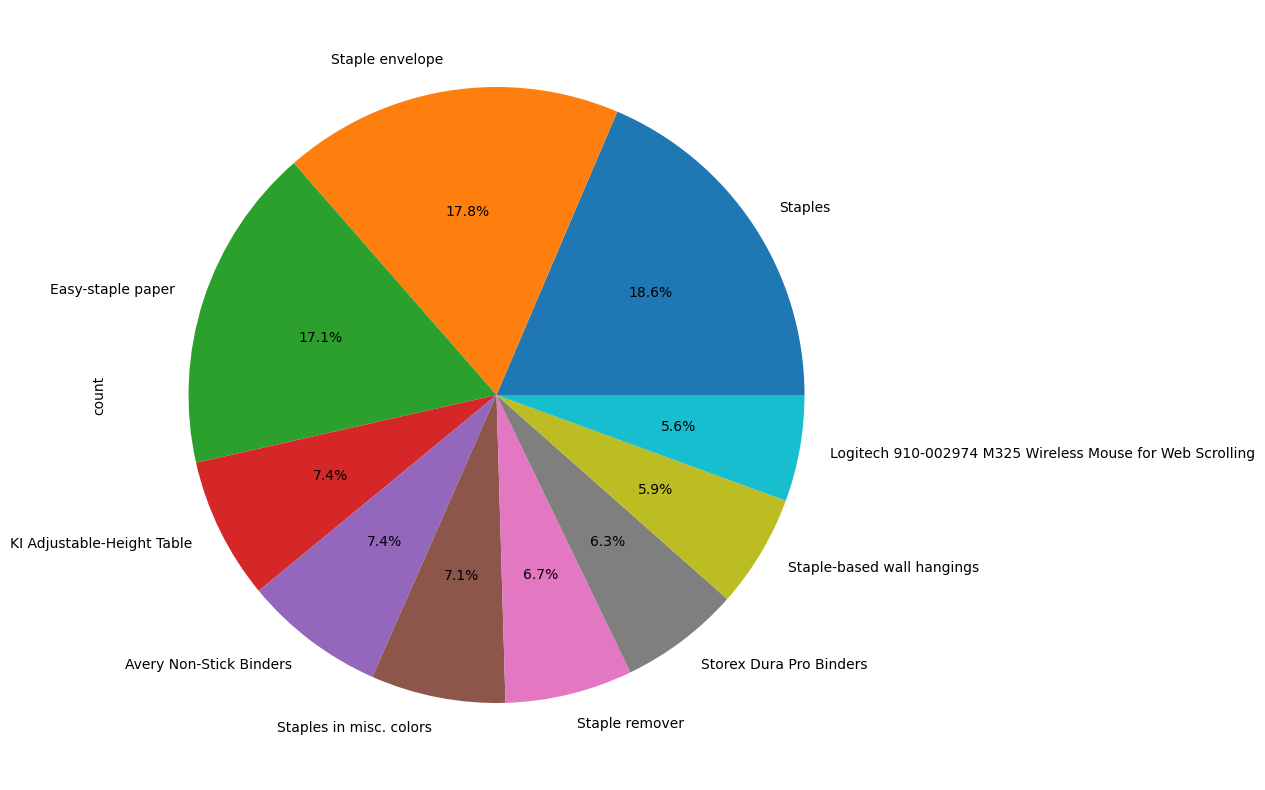

In [85]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

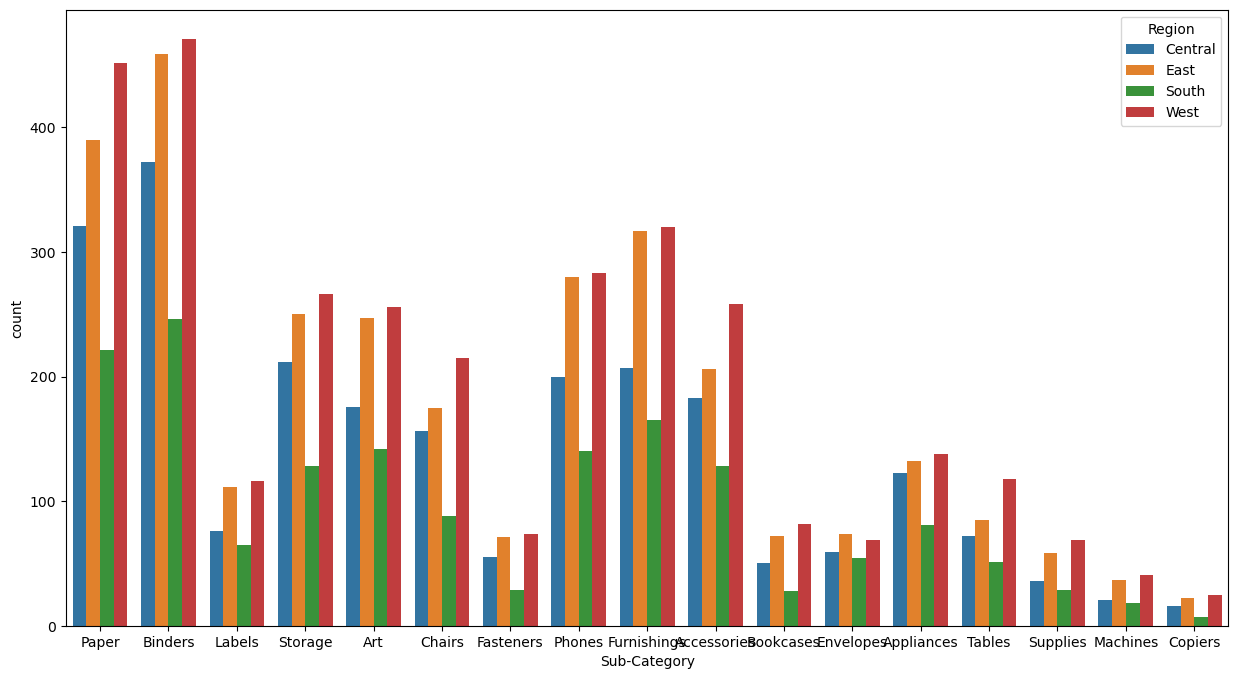

In [86]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [87]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     10.8968
1      9.0270
2      7.5123
3    337.5108
4     14.6520
Name: Cost, dtype: float64

In [88]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [89]:
#Profit Percentage of first 5 product names
df.iloc[[0,1,2,3,4],[14,20]]

,Sub-Category,Cost
0,Paper,10.8968
1,Binders,9.0270
2,Labels,7.5123
3,Storage,337.5108
4,Art,14.6520


In [90]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
3323,US-2020-156335,2020-09-25,2020-09-28,Second Class,PO-19195,Phillina Ober,Home Office,United States,Bayonne,New Jersey,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,52.4900,100.000000
4252,US-2021-109407,2021-01-24,2021-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,United States,Gulfport,Mississippi,...,OFF-BI-10000285,Office Supplies,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.360,4,0.0,15.6800,15.6800,100.000000
1103,US-2019-142769,2019-09-13,2019-09-13,Same Day,RP-19390,Resi Pölking,Consumer,United States,Seattle,Washington,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,48.940,1,0.0,24.4700,24.4700,100.000000
1776,US-2019-154095,2019-12-02,2019-12-07,Standard Class,ON-18715,Odella Nelson,Corporate,United States,Clinton,Maryland,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,146.820,3,0.0,73.4100,73.4100,100.000000
5163,US-2021-135265,2021-07-07,2021-07-09,Second Class,CC-12370,Christopher Conant,Consumer,United States,Los Angeles,California,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,48.940,1,0.0,24.4700,24.4700,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,US-2022-125647,2022-09-23,2022-09-28,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Chicago,Illinois,...,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,73.176,6,0.8,-197.5752,270.7512,-72.972973
3746,US-2020-107083,2020-11-21,2020-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Fort Worth,Texas,...,OFF-AP-10004136,Office Supplies,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,92.2050,-73.333333
7210,US-2022-119438,2022-03-18,2022-03-23,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,Texas,...,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,10.0800,-73.333333
7826,US-2022-155299,2022-06-08,2022-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,United States,Pasadena,Texas,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,6.0900,-73.333333


Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

<Axes: xlabel='Sales', ylabel='Profit'>

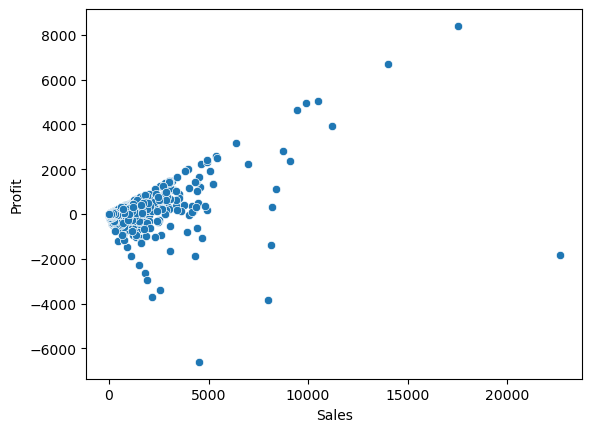

In [91]:
sns.scatterplot(x='Sales', y='Profit', data=df)

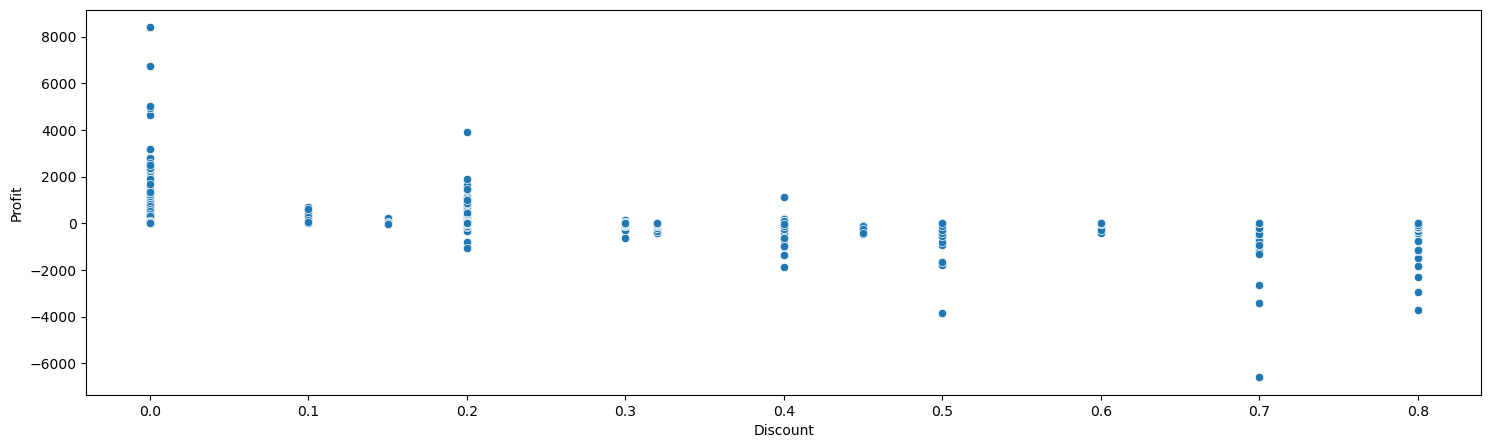

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, ax=ax)
plt.show()


<Axes: xlabel='Sub-Category'>

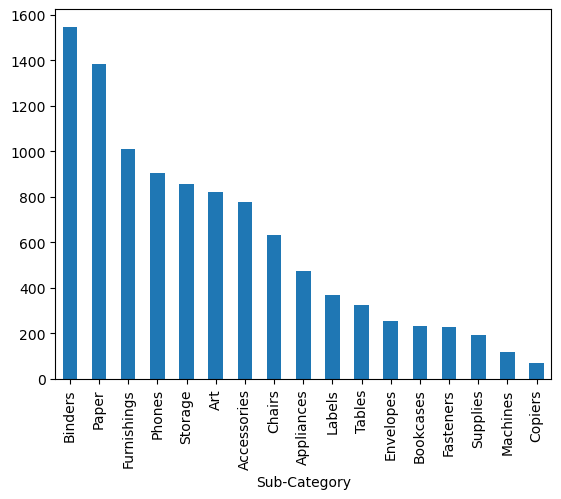

In [93]:
df['Sub-Category'].value_counts().plot(kind="bar")

<Axes: xlabel='Region'>

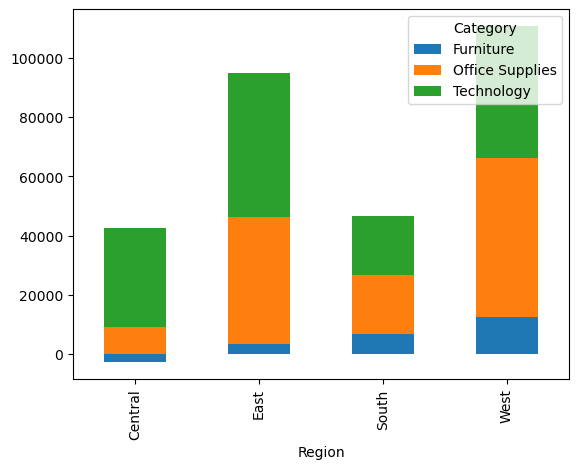

In [94]:
pd.crosstab(df["Region"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)

<Axes: xlabel='Category'>

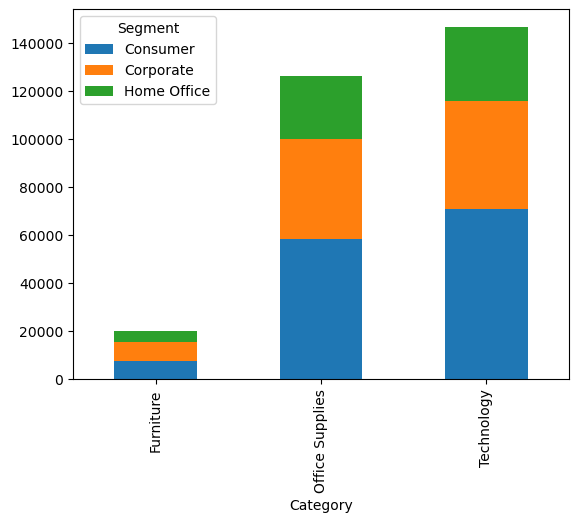

In [95]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

<Axes: xlabel='Category'>

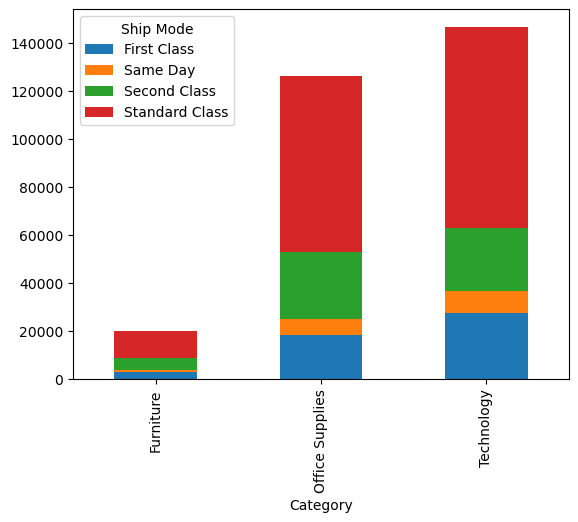

In [96]:
pd.crosstab(index=df["Category"],columns=df["Ship Mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

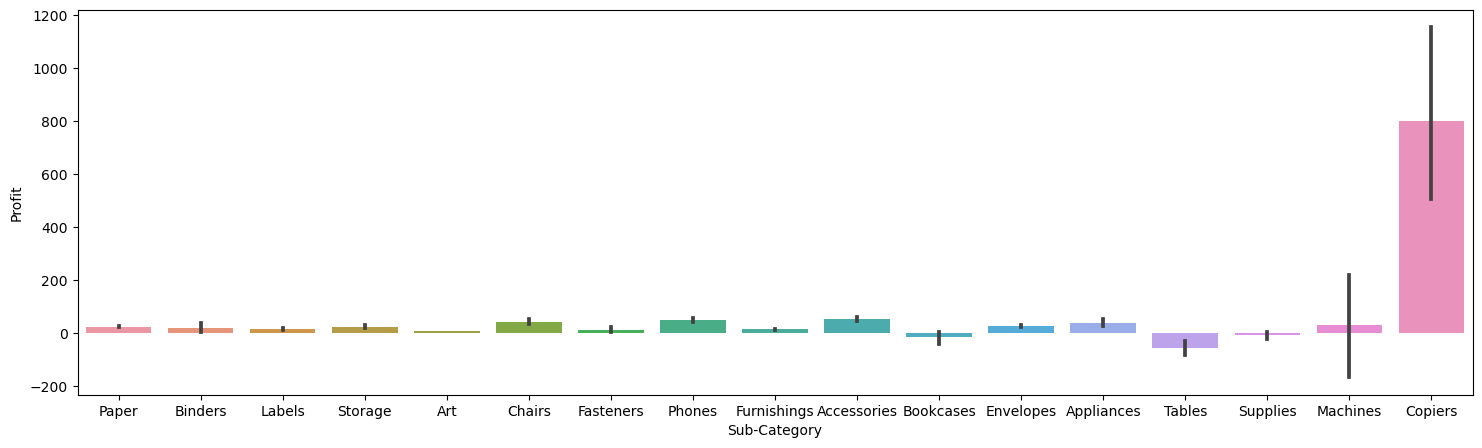

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
sns.barplot(x='Sub-Category', y='Profit', data=df, ax=ax)
plt.show()


# LETS LOOK AT THE DATA WRT TO CUSTOMER LEVEL 

In [98]:
df['Customer ID'].nunique()

804

In [99]:
#Top 10 customers who order frequently
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

Customer Name
William Brown          41
Ben Ferrer             37
Greg Guthrie           36
Jane Waco              34
John Lee               34
Paul Prost             34
Matt Abelman           34
Xylona Preis           34
Edward Hooks           32
Chloris Kastensmidt    32
Name: count, dtype: int64

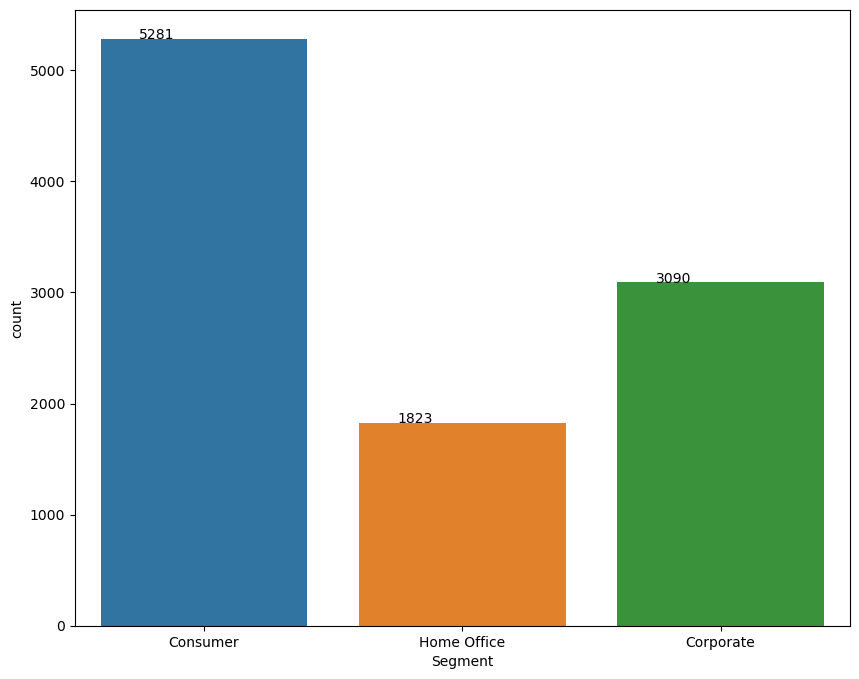

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
s = sns.countplot(x='Segment', data=df)  # Corrected the argument to x='Segment'
for p in ax.patches:  # Changed the variable name to p to avoid confusion
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1))
plt.show()

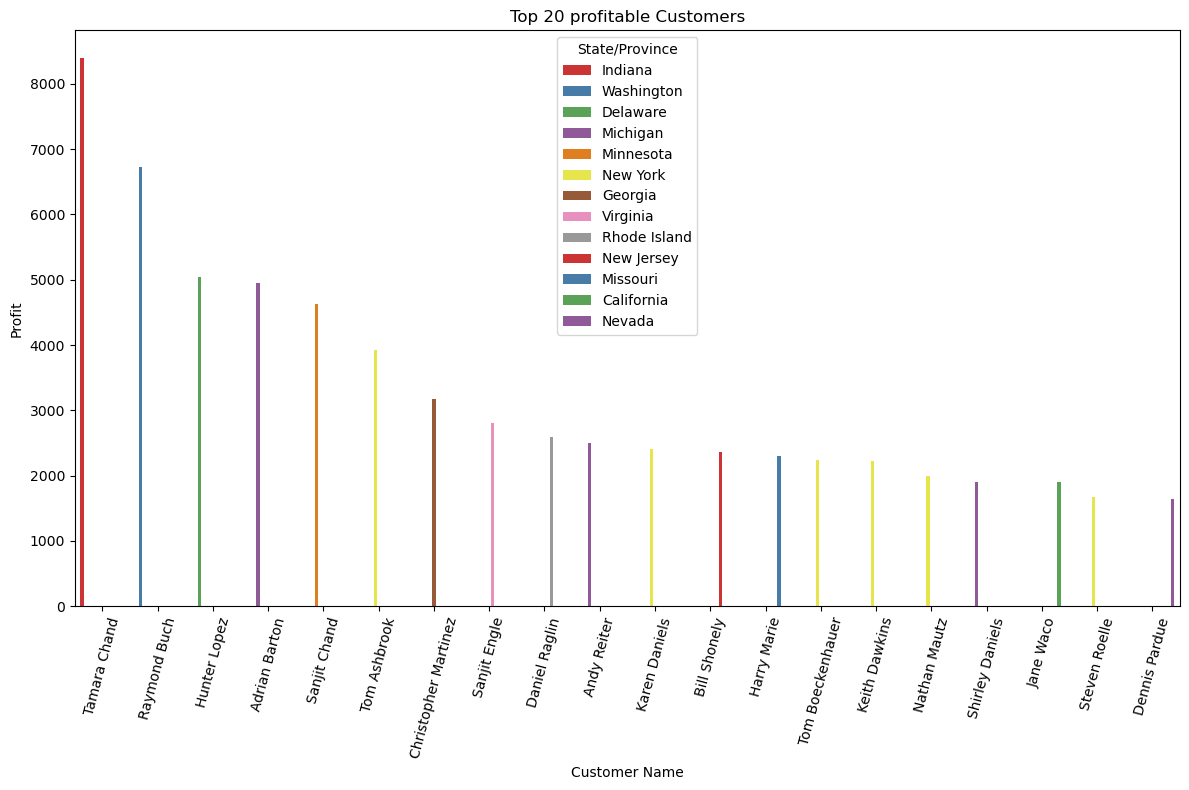

In [101]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit', hue='State/Province', palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [102]:
print(sortedTop20.columns)
print(sortedTop20.dtypes)


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Cost',
       'Profit %'],
      dtype='object')
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State/Province            object
Postal Code               object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float

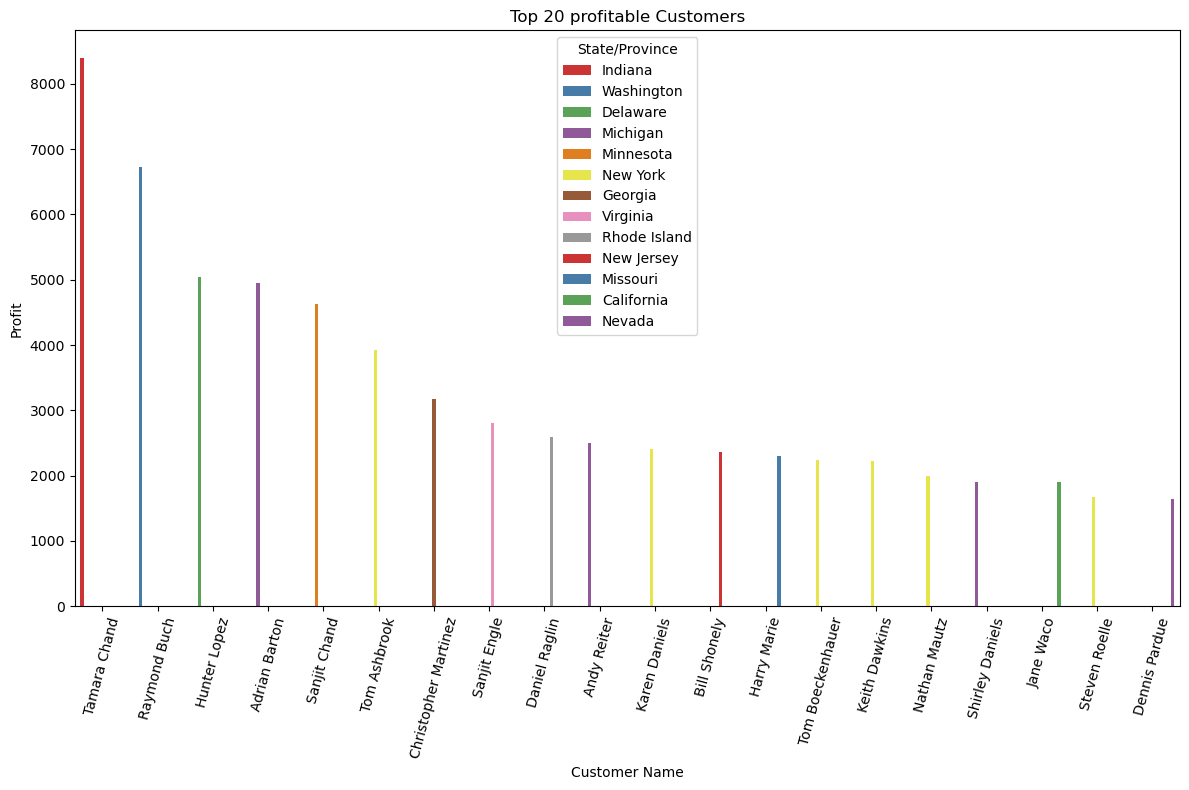

In [103]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit', hue='State/Province', palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [104]:
df['Order ID'].nunique()

5111

In [105]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0        4
1        4
2        4
3        4
4        7
        ..
10189    4
10190    4
10191    4
10192    4
10193    4
Name: Shipment Duration, Length: 10194, dtype: int64

In [106]:
df.iloc[:,[0,3,21]]


,Order ID,Ship Mode,Profit %
0,US-2019-103800,Standard Class,50.943396
1,US-2019-112326,Standard Class,-60.784314
2,US-2019-112326,Standard Class,56.862745
3,US-2019-112326,Standard Class,-19.191919
4,US-2019-141817,Standard Class,33.333333
...,...,...,...
10189,US-2022-143259,Standard Class,60.000000
10190,US-2022-115427,Standard Class,45.454545
10191,US-2022-156720,Standard Class,-16.666667
10192,US-2022-143259,Standard Class,3.092784


In [107]:
#creating function and appending customer and order info to it.
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [108]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2019-03-31,2022-06-29,[Fellowes Advanced Computer Series Surge Prote...,"[San Francisco, New York City, Round Rock, Min..."
AA-10375,15,1056.390,52.349415,2019-04-21,2022-12-11,"[ACCOHIDE Binder by Acco, Avery Premier Heavy-...","[Los Angeles, Rancho Cucamonga, Omaha, Salem, ..."
AA-10480,12,1790.512,55.580242,2019-05-04,2022-04-15,"[DAX Wood Document Frame, Strathmore Photo Fra...","[Middletown, Springfield, Detroit, Concord]"
AA-10645,18,5086.935,42.364755,2019-06-22,2022-11-05,[Hon Deluxe Fabric Upholstered Stacking Chairs...,"[Chester, Lowell, Oklahoma City, San Francisco..."
AB-10015,6,886.156,15.186975,2019-02-18,2021-11-10,"[Akro Stacking Bins, Global Push Button Manage...","[Arlington, Seattle, Oklahoma City]"
...,...,...,...,...,...,...,...
XP-21865,34,2503.156,56.831639,2019-01-20,2022-11-17,"[Ultra Door Push Plate, Eldon ClusterMat Chair...","[Westland, Hollywood, San Diego, Chico, Calgar..."
YC-21895,8,5454.350,42.235317,2019-11-17,2022-12-26,[Eldon Econocleat Chair Mats for Low Pile Carp...,"[Newark, Los Angeles, San Francisco, Dallas, F..."
YS-21880,12,6720.444,37.278442,2020-01-12,2022-12-21,"[Dual Level, Single-Width Filing Carts, Bevis ...","[Newark, Montgomery, Los Angeles, Hesperia, Co..."


In [109]:
#extracting the year of order
df['order year']=df['Order Date'].dt.year
df['order year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: order year, dtype: int32

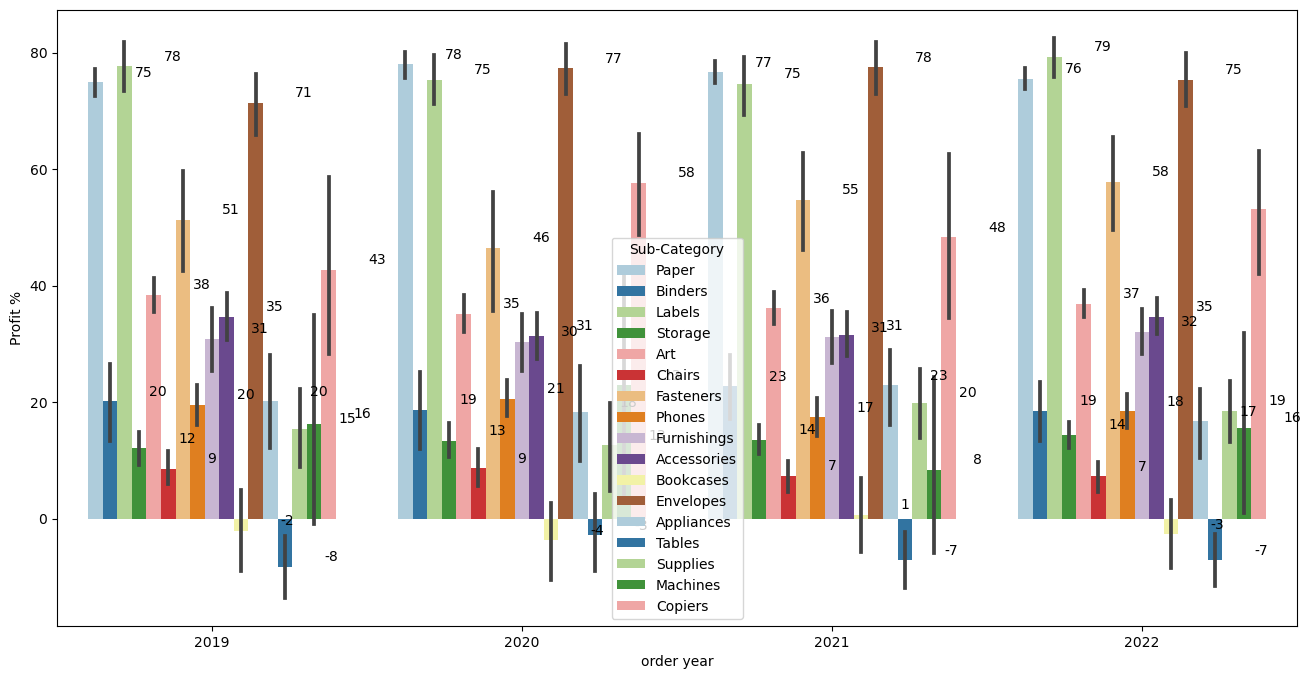

In [110]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
sns.barplot(x='order year', y='Profit %', hue='Sub-Category', palette='Paired', data=df, ax=ax)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x() + 0.15, o.get_height() + 1))
plt.show()

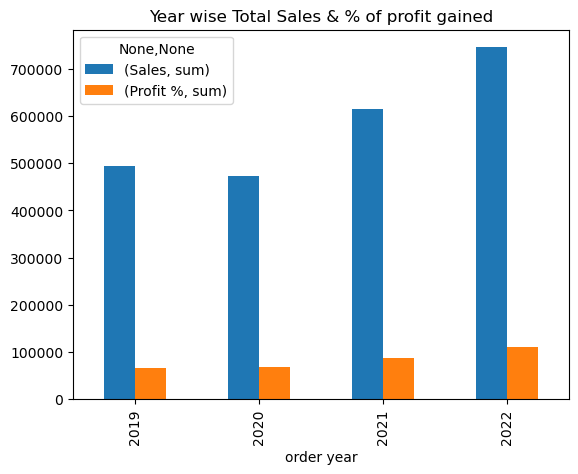

In [111]:
# Sales per year
df.groupby('order year')[['Sales', 'Profit %']].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')
plt.show()


In [112]:
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules
# import pandas as pd

# # Load your dataset into a DataFrame (replace 'your_file.csv' with your actual file)
# df =pd.read_excel('Sales Data.xls')

# # Convert categorical variables to dummy/indicator variables
# df_dummy = pd.get_dummies(df[['Product Name']], prefix='', prefix_sep='')

# # Find frequent itemsets
# frequent_itemsets = apriori(df_dummy, min_support=0.05, use_colnames=True)

# # Find association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Print the association rules
# print(rules)


In [113]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


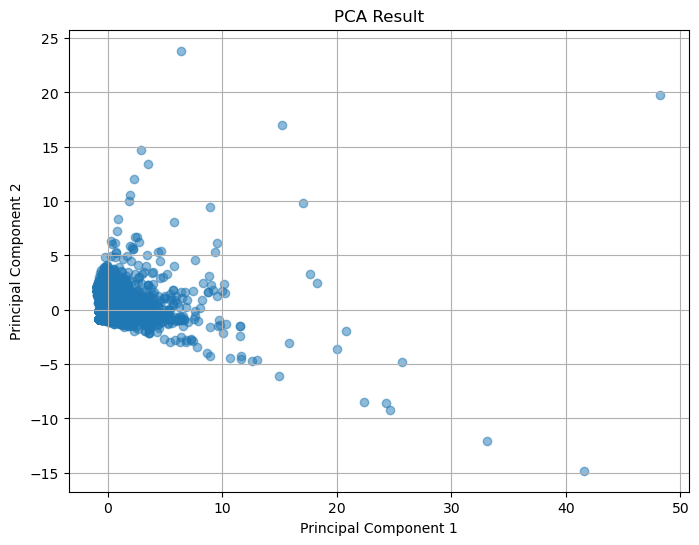

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Cost']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

import matplotlib.pyplot as plt

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()



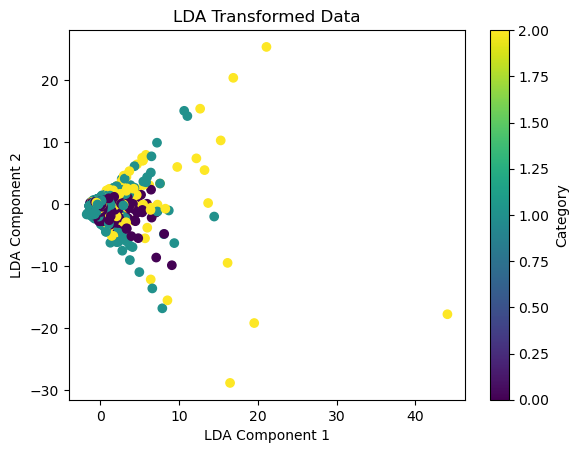

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Cost']])

# Apply LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(scaled_data, df['Category'])

# Plot the LDA-transformed data with a colormap
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=df['Category'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data')
plt.colorbar(label='Category')
plt.show()


In [118]:
# Example code for collaborative filtering using Surprise library
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load data into Surprise Dataset
reader = Reader()
data = Dataset.load_from_df(df[['Customer ID', 'Product ID', 'Sales']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Calculate RMSE
accuracy.rmse(predictions)


ModuleNotFoundError: No module named 'surprise'

In [119]:
pip install scikit-surpris


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-surpris (from versions: none)
ERROR: No matching distribution found for scikit-surpris


In [121]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource

output_file("scatter.html")

source = ColumnDataSource(df)

p = figure(width=800, height=400, x_axis_label='Sales', y_axis_label='Profit')

p.circle('Sales', 'Profit', source=source, size=10, color='blue', alpha=0.5)

show(p)


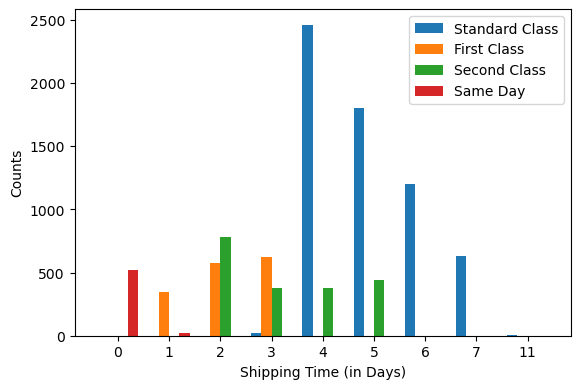

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Calculate shipping time
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract data for the graph
shipping_times = sorted(df['Shipping Time'].unique())
ship_modes = df['Ship Mode'].unique()

# Create a dictionary to store counts for each ship mode
ship_mode_counts = {}
for mode in ship_modes:
    ship_mode_counts[mode] = df[df['Ship Mode'] == mode]['Shipping Time'].value_counts().reindex(shipping_times, fill_value=0).tolist()

# Create the figure and axis
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.2

# Set the index positions for each bar group
index = range(len(shipping_times))

# Plot the bars for each ship mode
for i, mode in enumerate(ship_modes):
    bar = ax.bar([x + i * bar_width for x in index], ship_mode_counts[mode], bar_width, label=mode)

# Set the x-ticks with shipping times
ax.set_xticks([i + (len(ship_modes) - 1) * bar_width / 2 for i in index])
ax.set_xticklabels(shipping_times)

# Set the x and y axis labels
ax.set_xlabel('Shipping Time (in Days)')
ax.set_ylabel('Counts')

# Add a legend
ax.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the graph
plt.show()


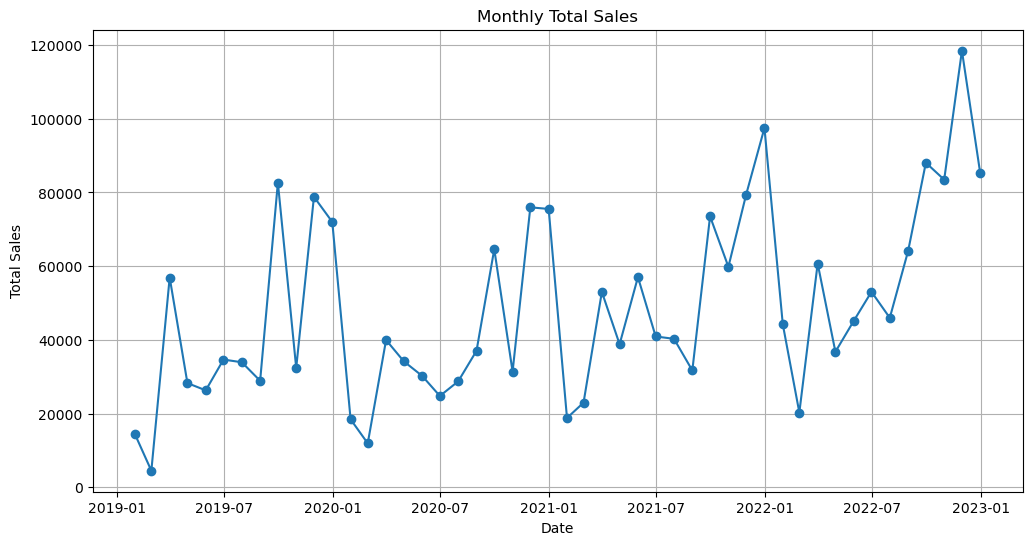

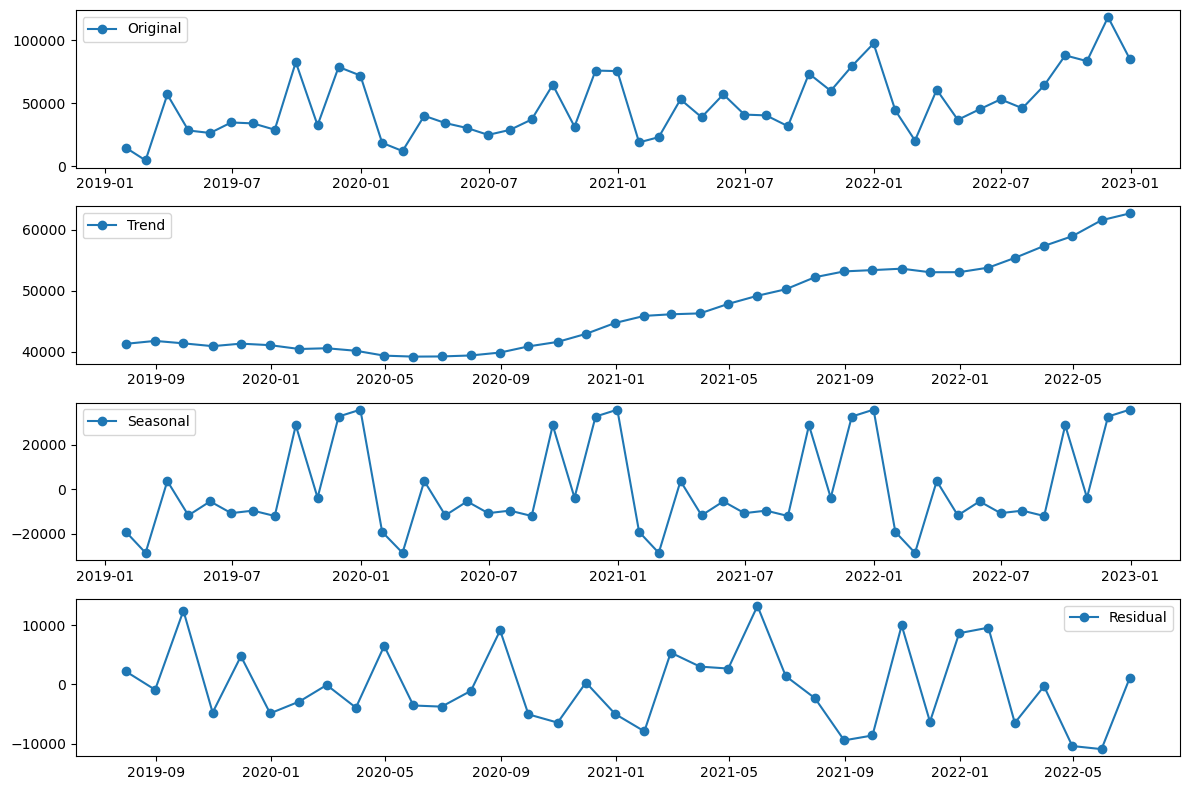

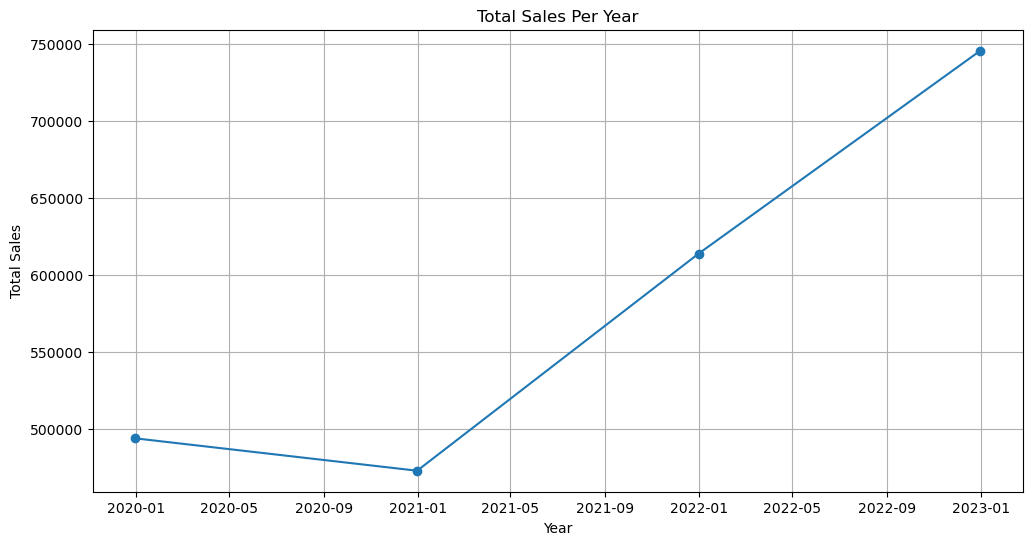

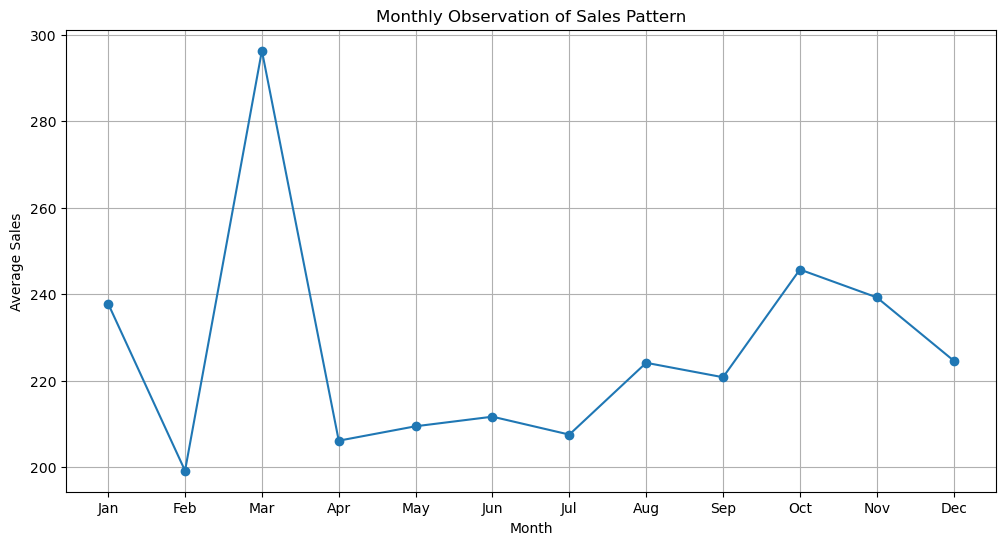

<Figure size 1200x600 with 0 Axes>

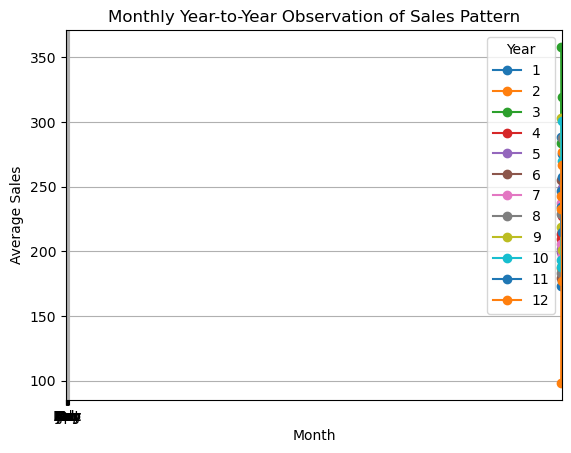

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Set the 'Order Date' column as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency
monthly_sales = df.resample('M').sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Decompose the time series data to analyze trends and seasonality
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(monthly_sales['Sales'], label='Original', marker='o', linestyle='-')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', marker='o', linestyle='-')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', marker='o', linestyle='-')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual', marker='o', linestyle='-')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Total Sales per Year
yearly_sales = df.resample('Y').sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Sales'], marker='o', linestyle='-')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Monthly Observation of Sales Pattern
monthly_observation = df.groupby(df.index.month)['Sales'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_observation, marker='o', linestyle='-')
plt.title('Monthly Observation of Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Monthly Year-to-Year Observation of Sales Pattern
monthly_year_to_year = df.groupby([df.index.year, df.index.month])['Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
monthly_year_to_year.plot(marker='o', linestyle='-')
plt.title('Monthly Year-to-Year Observation of Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


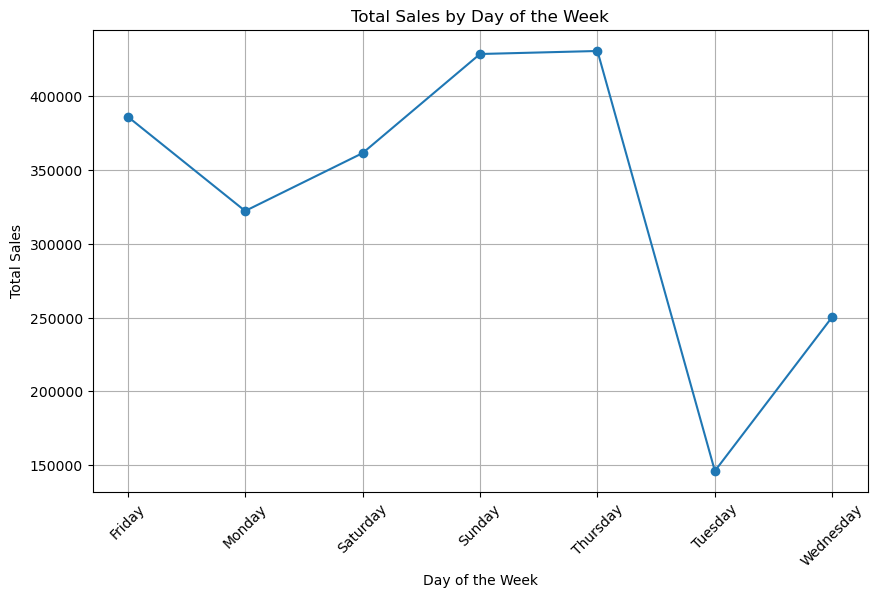

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Set the 'Order Date' column as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Aggregate sales by day of the week
sales_by_day = df.groupby('Day of Week')['Sales'].sum()

# Plot sales over days of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(marker='o', linestyle='-')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


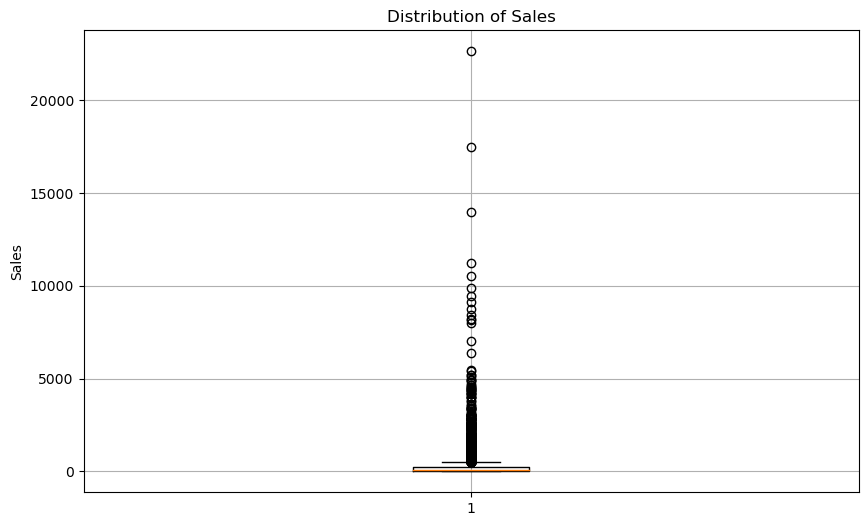

<Figure size 1200x600 with 0 Axes>

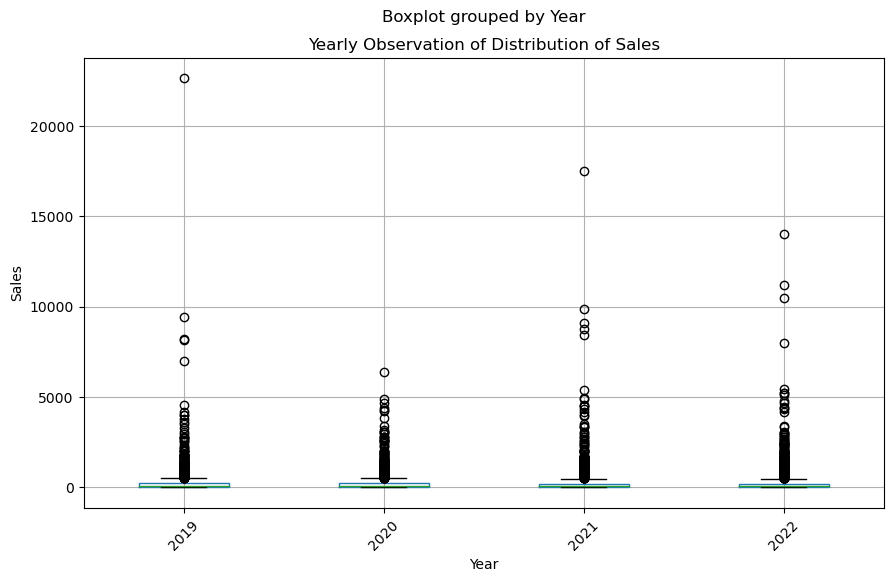

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Set the 'Order Date' column as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year from the order date
df['Year'] = df['Order Date'].dt.year

# Box and whisker plot for distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'])
plt.title('Distribution of Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Yearly observation of distribution of data
plt.figure(figsize=(12, 6))
df.boxplot(column='Sales', by='Year', figsize=(10,6))
plt.title('Yearly Observation of Distribution of Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [38]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Set the 'Order Date' column as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency
monthly_sales = df.resample('M').sum()

# Perform the Augmented Dickey-Fuller test
result = adfuller(monthly_sales['Sales'])

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -4.437507341232084
p-value: 0.0002546064925406147
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


Augmented Dickey-Fuller (ADF) Test Result:
ADF Statistic: -4.437507341232084
p-value: 0.0002546064925406147
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


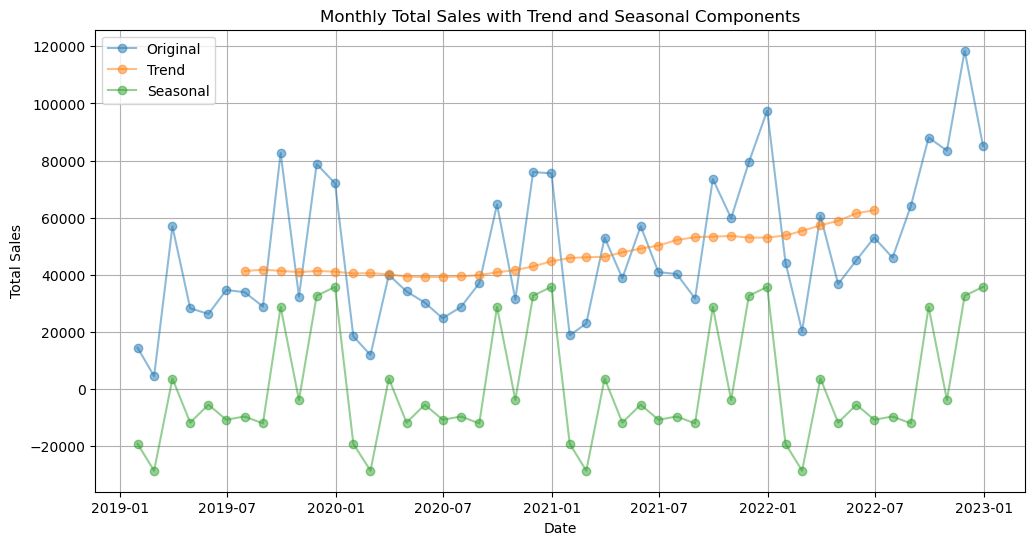

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Excel data
df = pd.read_excel('Sales Data.xls')

# Set the 'Order Date' column as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency
monthly_sales = df.resample('M').sum()

# Perform the Augmented Dickey-Fuller test
result = adfuller(monthly_sales['Sales'])

# Print the ADF test result
print("Augmented Dickey-Fuller (ADF) Test Result:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Decompose the time series to visualize trend and seasonality
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original time series data with trend and seasonal components
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], label='Original', marker='o', linestyle='-', alpha=0.5)
plt.plot(trend, label='Trend', marker='o', linestyle='-', alpha=0.5)
plt.plot(seasonal, label='Seasonal', marker='o', linestyle='-', alpha=0.5)
plt.title('Monthly Total Sales with Trend and Seasonal Components')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


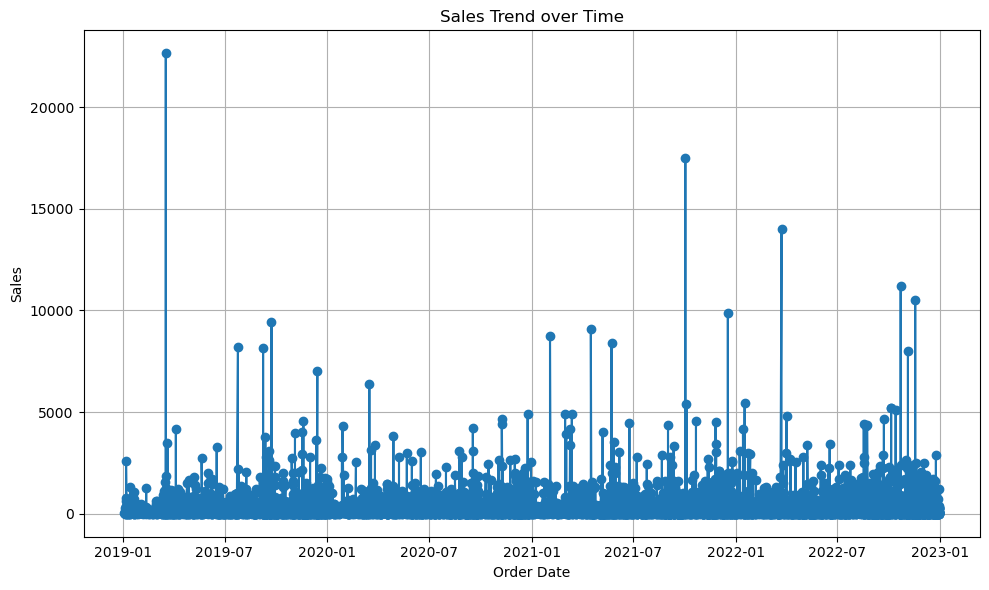

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('Sales Data.xls')

# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort data by 'Order Date'
df = df.sort_values(by='Order Date')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Sales'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trend over Time')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


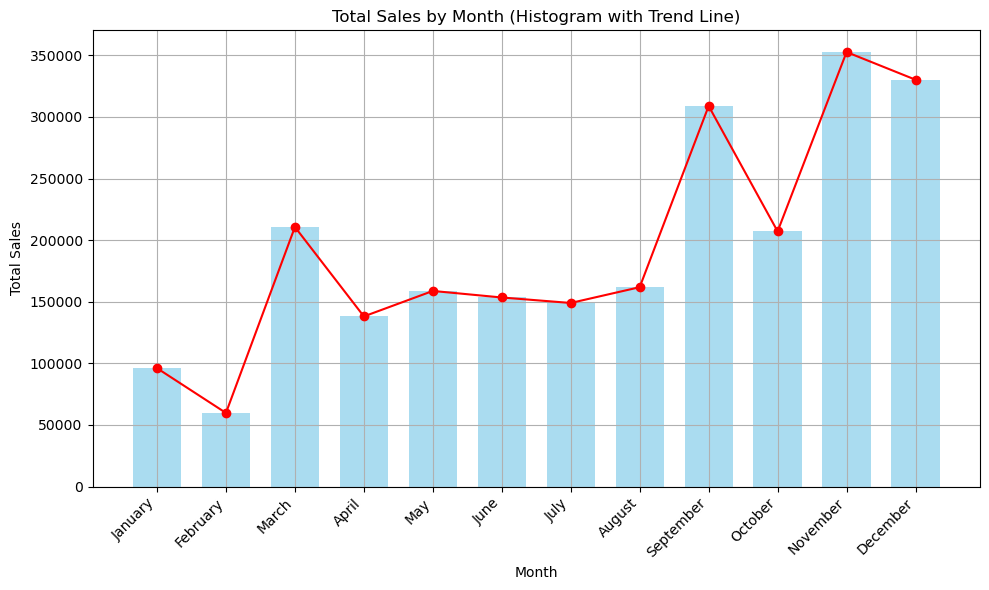

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Read the Excel file
df = pd.read_excel('Sales Data.xls')

# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by month and sum the sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Calculate the midpoints of each bin
bin_edges = range(1, 14)  # 13 edges for 12 bins
bin_midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_midpoints, monthly_sales.values, color='skyblue', alpha=0.7, width=0.7, linewidth=0)  # Adjust alpha for transparency
plt.plot(bin_midpoints, monthly_sales.values, marker='o', linestyle='-', color='red')  # Connect bins with a line
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month (Histogram with Trend Line)')

# Use month names as tick labels
plt.xticks(bin_midpoints, [calendar.month_name[int(x)] for x in bin_midpoints], rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()
